In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#data = /content/ai4i2020.csv

df = pd.read_csv("/content/Test_Data_CSV.csv")

# Select features and target
X = df[['Differential_pressure', 'Flow_rate', 'Time', 'Dust_feed']]
y = df['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1515.6954450798708


# DATA EXPLORATION

In [ ]:
df.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,1,0.271267,52.281993,0.1,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.9
1,1,0.361690,54.986671,0.2,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.8
2,1,0.000000,55.424786,0.3,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.7
3,1,2.622251,55.524146,0.4,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.6
4,1,3.888165,55.852018,0.5,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.5


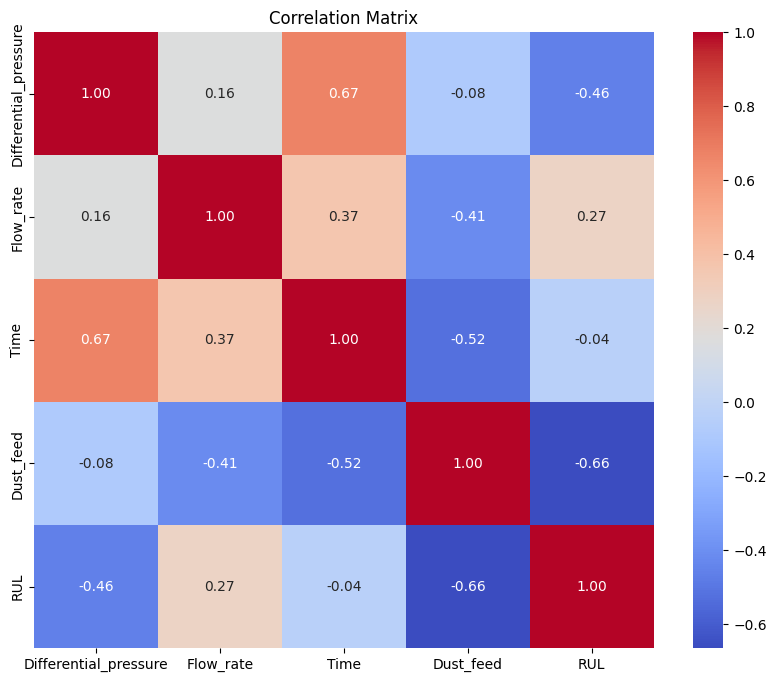

In [ ]:
import seaborn as sns

selected_columns = ['Differential_pressure', 'Flow_rate', 'Time', 'Dust_feed', 'RUL']
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

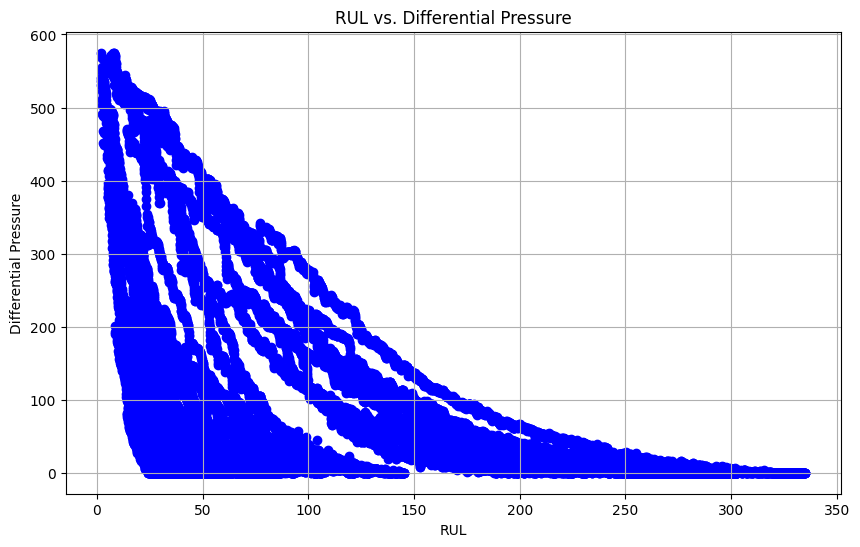

In [ ]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['RUL'], df['Differential_pressure'], color='blue')
plt.title('RUL vs. Differential Pressure')
plt.xlabel('RUL')
plt.ylabel('Differential Pressure')
plt.grid(True)
plt.show()

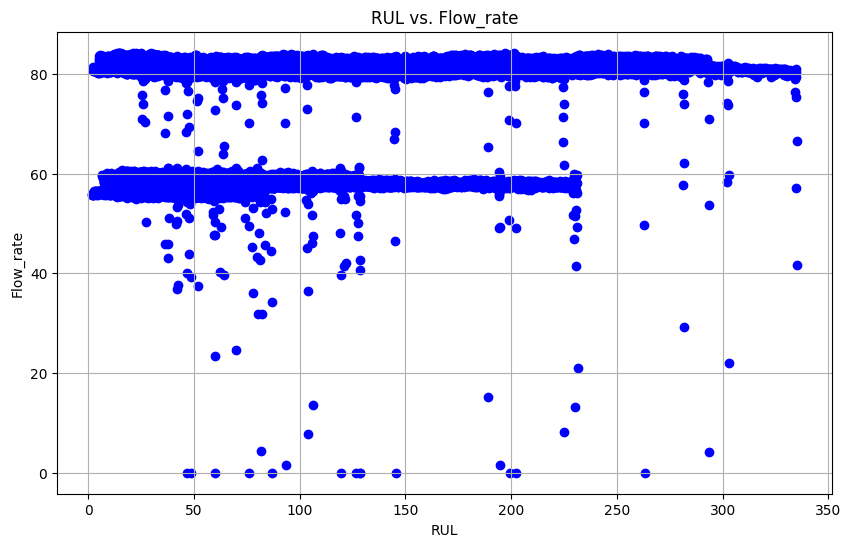

In [ ]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['RUL'], df['Flow_rate'], color='blue')
plt.title('RUL vs. Flow_rate')
plt.xlabel('RUL')
plt.ylabel('Flow_rate')
plt.grid(True)
plt.show()

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'column_names' is a list containing the names of the columns you want to scale
column_names = ['Differential_pressure', 'Flow_rate']

# Create a StandardScaler instance
scaler = StandardScaler()

# Extract the data from the specified columns
data_to_scale = df[column_names].values

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_data, columns=column_names)

# Now 'scaled_df' contains the standardized values



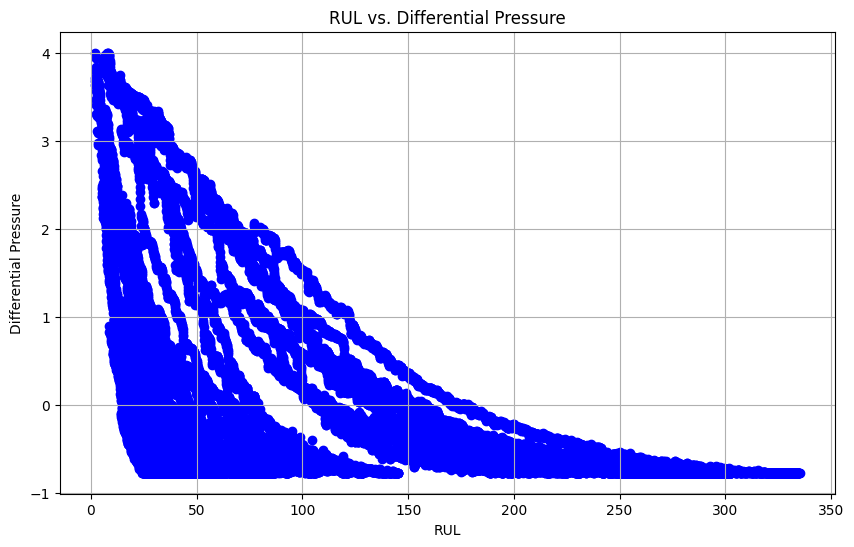

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RUL'], scaled_df['Differential_pressure'], color='blue')
plt.title('RUL vs. Differential Pressure')
plt.xlabel('RUL')
plt.ylabel('Differential Pressure')
plt.grid(True)
plt.show()

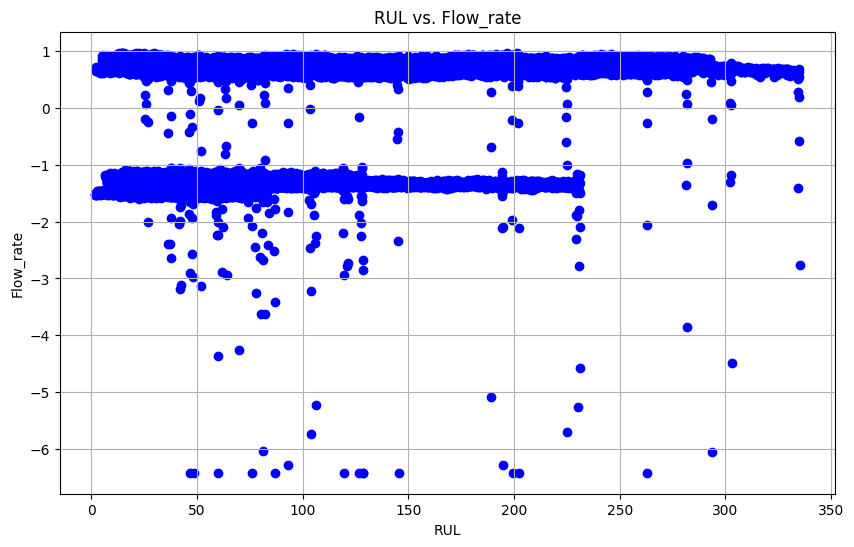

In [ ]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['RUL'], scaled_df['Flow_rate'], color='blue')
plt.title('RUL vs. Flow_rate')
plt.xlabel('RUL')
plt.ylabel('Flow_rate')
plt.grid(True)
plt.show()

# Modelling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Training MSE: 1506.0653824889846
Test MSE: 1515.6954450798708


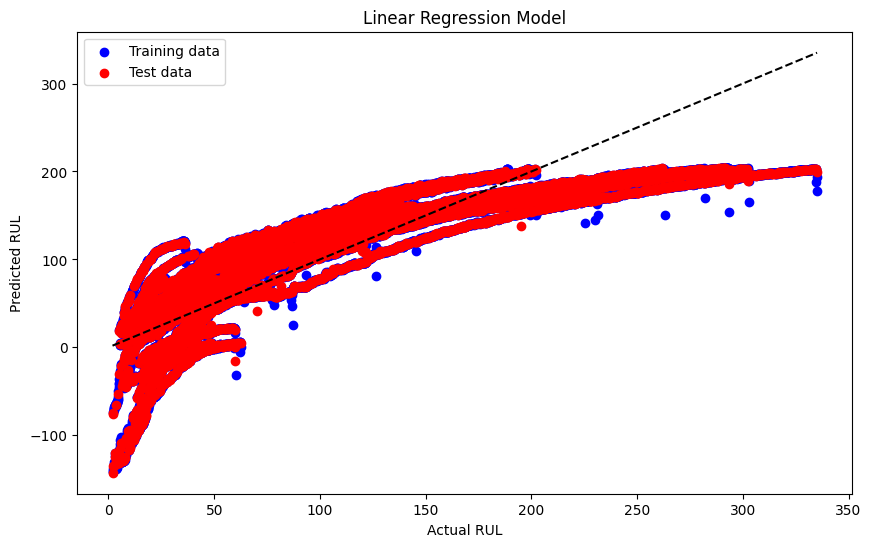

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset

# Extract features and target
X = df.drop(columns=["RUL", "Dust","Data_No"])
y = df["RUL"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering - Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred, color='red', label='Test data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.title('Linear Regression Model')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()


Ridge Regression Training MSE: 500.1026387804365
Ridge Regression Test MSE: 491.76768122154454
Random Forest Training MSE: 0.13707482924740857
Random Forest Test MSE: 0.8081071357351283


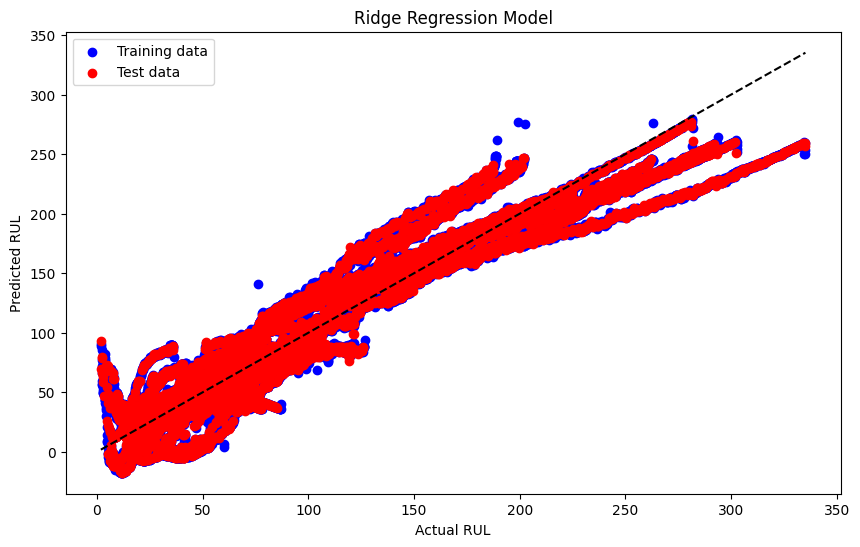

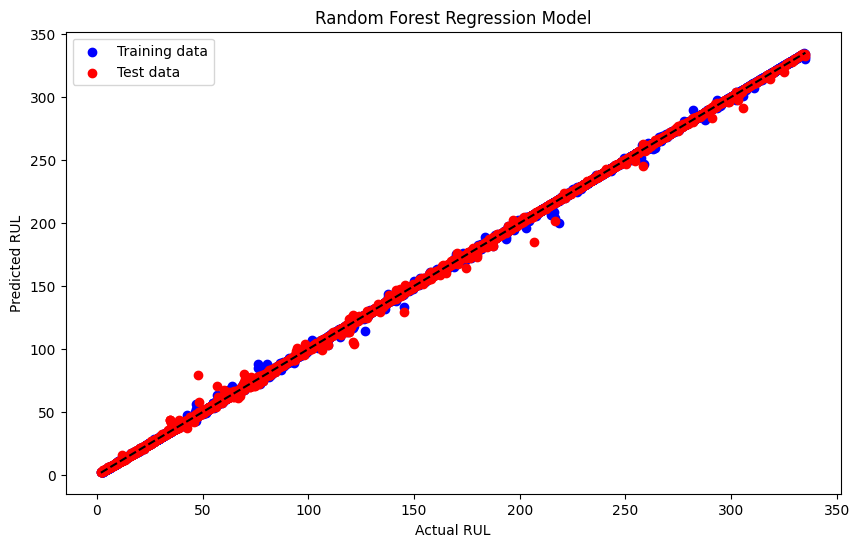

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Extract features and target
X = df.drop(columns=["RUL", "Dust"])
y = df["RUL"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering - Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Ridge Regression Model
ridge_model = Ridge(alpha=0.9)
ridge_model.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
print("Ridge Regression Training MSE:", ridge_train_mse)
print("Ridge Regression Test MSE:", ridge_test_mse)

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)
rf_train_mse = mean_squared_error(y_train, y_train_pred_rf)
rf_test_mse = mean_squared_error(y_test, y_test_pred_rf)
print("Random Forest Training MSE:", rf_train_mse)
print("Random Forest Test MSE:", rf_test_mse)

# Plotting the loss for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_ridge, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred_ridge, color='red', label='Test data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.title('Ridge Regression Model')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()

# Plotting the loss for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_rf, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred_rf, color='red', label='Test data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.title('Random Forest Regression Model')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()


247/247 [==============================] - 0s 1ms/step
Mean Squared Error (Training): 955.7399363626074
Mean Squared Error (Test): 934.0432021942155


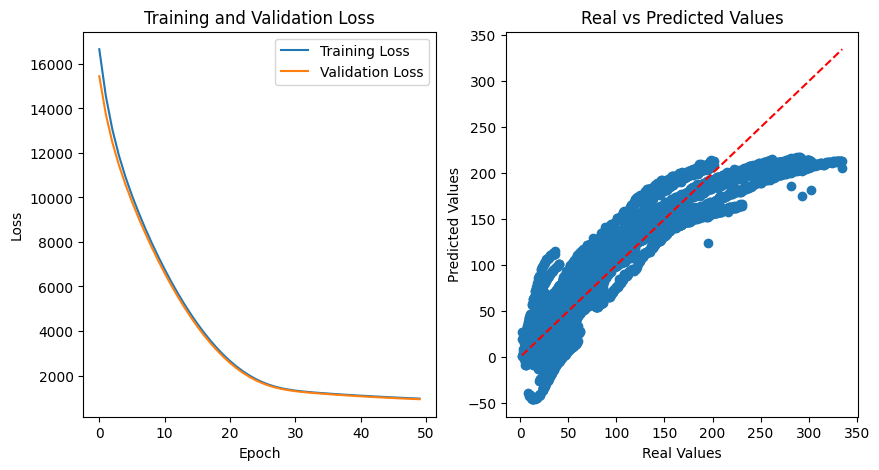

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Select features and target
X = df[['Differential_pressure', 'Flow_rate', 'Time', 'Dust_feed']]
y = df['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
# Feature Engineering - Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Define the linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train_scaled.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=0)

# Predict on training and test set
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

# Compute MSE for training and test set
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Plot the decreasing loss during training
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot real vs predicted values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')
plt.show()


In [ ]:
import xgboost as xgb

XGBoost Training MSE: 32.03518168975716
XGBoost Test MSE: 57.74802455851309


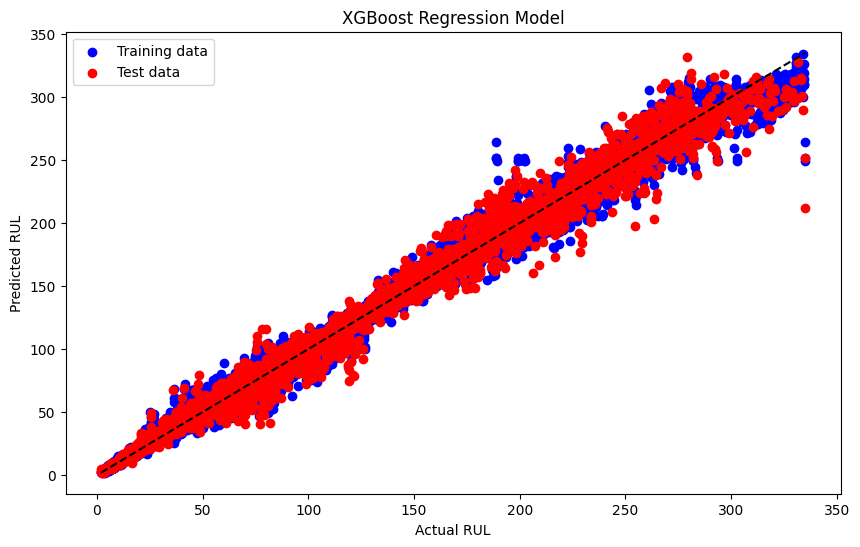

In [ ]:
# XGBoost Regression Model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.4, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_train_mse = mean_squared_error(y_train, y_train_pred_xgb)
xgb_test_mse = mean_squared_error(y_test, y_test_pred_xgb)
print("XGBoost Training MSE:", xgb_train_mse)
print("XGBoost Test MSE:", xgb_test_mse)

# Plotting the loss for XGBoost Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_xgb, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred_xgb, color='red', label='Test data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.title('XGBoost Regression Model')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()


Decision Tree Training MSE: 0.3243909697334899
Decision Tree Test MSE: 87.00549727261196


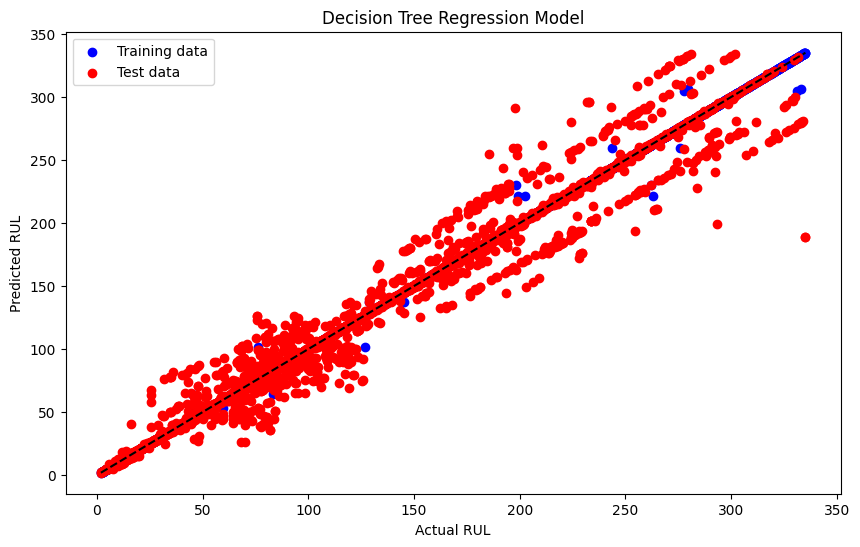

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)
dt_train_mse = mean_squared_error(y_train, y_train_pred_dt)
dt_test_mse = mean_squared_error(y_test, y_test_pred_dt)
print("Decision Tree Training MSE:", dt_train_mse)
print("Decision Tree Test MSE:", dt_test_mse)

# Plotting the loss for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_dt, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred_dt, color='red', label='Test data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.title('Decision Tree Regression Model')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()


Support Vector Machine Training MSE: 355.6934498480174
Support Vector Machine Test MSE: 339.6435621906894


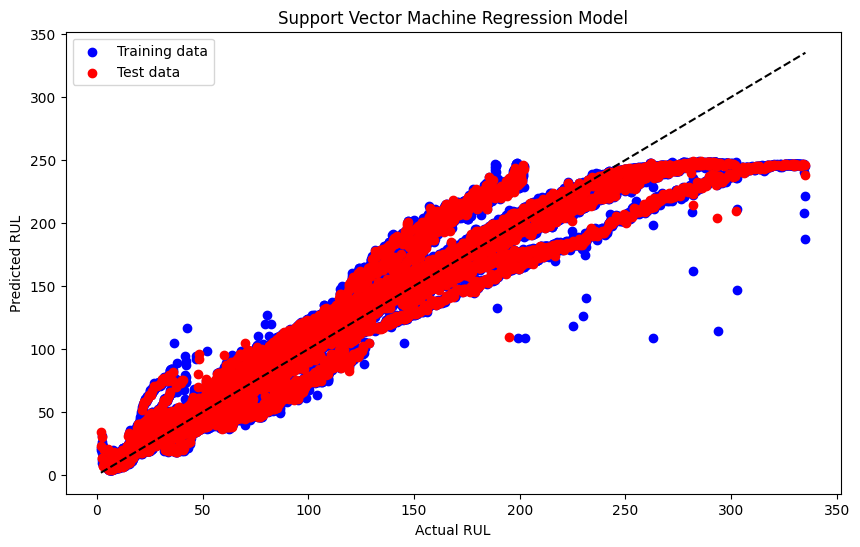

In [ ]:
from sklearn.svm import SVR

# SVR Regression Model
svm_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used
svm_model.fit(X_train_scaled, y_train)
y_train_pred_svm = svm_model.predict(X_train_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)
svm_train_mse = mean_squared_error(y_train, y_train_pred_svm)
svm_test_mse = mean_squared_error(y_test, y_test_pred_svm)
print("Support Vector Machine Training MSE:", svm_train_mse)
print("Support Vector Machine Test MSE:", svm_test_mse)

# Plotting the loss for Support Vector Machine Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_svm, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred_svm, color='red', label='Test data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.title('Support Vector Machine Regression Model')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()


PLS Regression Training MSE: 541.8855441978873
PLS Regression Test MSE: 529.1218161543508


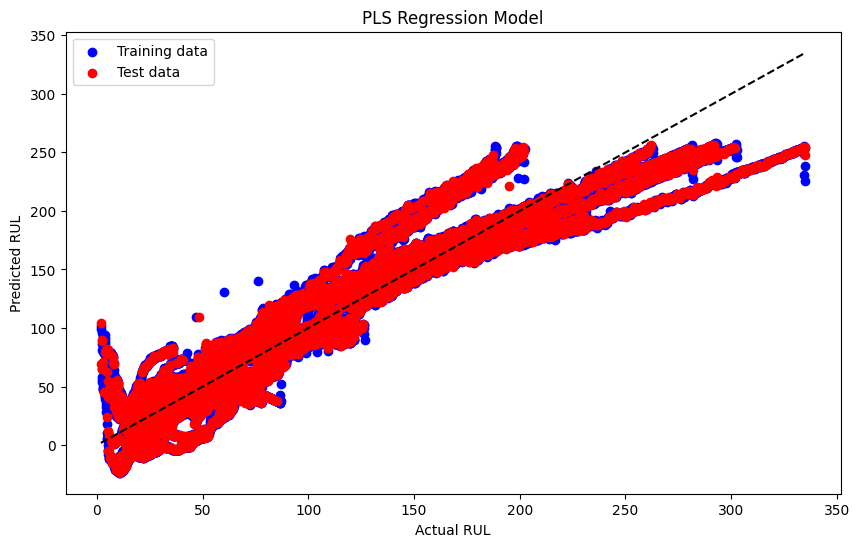

In [ ]:
from sklearn.cross_decomposition import PLSRegression

# PLS Regression Model
pls_model = PLSRegression(n_components=11)  # Specify the number of components
pls_model.fit(X_train_scaled, y_train)
y_train_pred_pls = pls_model.predict(X_train_scaled)
y_test_pred_pls = pls_model.predict(X_test_scaled)
pls_train_mse = mean_squared_error(y_train, y_train_pred_pls)
pls_test_mse = mean_squared_error(y_test, y_test_pred_pls)
print("PLS Regression Training MSE:", pls_train_mse)
print("PLS Regression Test MSE:", pls_test_mse)

# Plotting the loss for PLS Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_pls, color='blue', label='Training data')
plt.scatter(y_test, y_test_pred_pls, color='red', label='Test data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.title('PLS Regression Model')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()


# Prediction on Second Dataset

In [ ]:
df_train = pd.read_csv("/content/Train_Data_CSV.csv")

# Select features and target
X_train_new = df[['Differential_pressure', 'Flow_rate', 'Time', 'Dust_feed']]


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_new)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)

In [ ]:
y_pred_xgb = xgb_model.predict(X_train_scaled)

In [ ]:
y_pred_xgb

array([60.003452 , 63.683804 , 72.025734 , ...,  7.4244967,  7.4244967,
        7.4244967], dtype=float32)

In [ ]:
X_train_new

,Differential_pressure,Flow_rate,Time,Dust_feed
0,0.271267,52.281993,0.1,236.428943
1,0.361690,54.986671,0.2,236.428943
2,0.000000,55.424786,0.3,236.428943
3,2.622251,55.524146,0.4,236.428943
4,3.888165,55.852018,0.5,236.428943
...,...,...,...,...
39409,465.494800,82.675521,52.0,316.985065
39410,464.228900,82.421873,52.1,316.985065
39411,466.037300,82.743156,52.2,316.985065
39412,472.276500,82.785427,52.3,316.985065


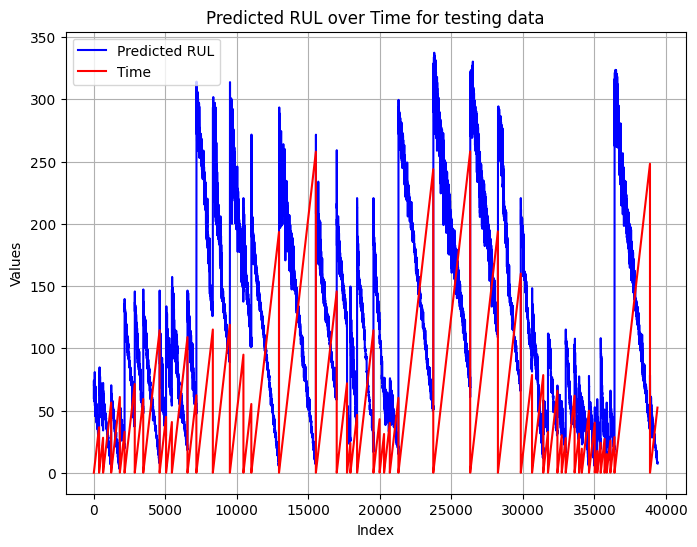

In [ ]:
plt.figure(figsize=(8, 6))

# Plot the array
plt.plot(y_pred_xgb, label='Predicted RUL', color='blue')

# Plot a column of the DataFrame
plt.plot(X_train_new['Time'], label='Time', color='red')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Predicted RUL over Time for testing data')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

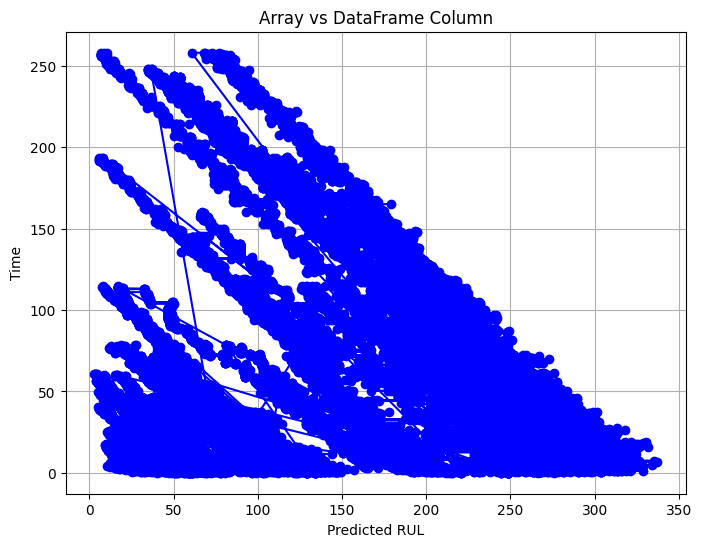

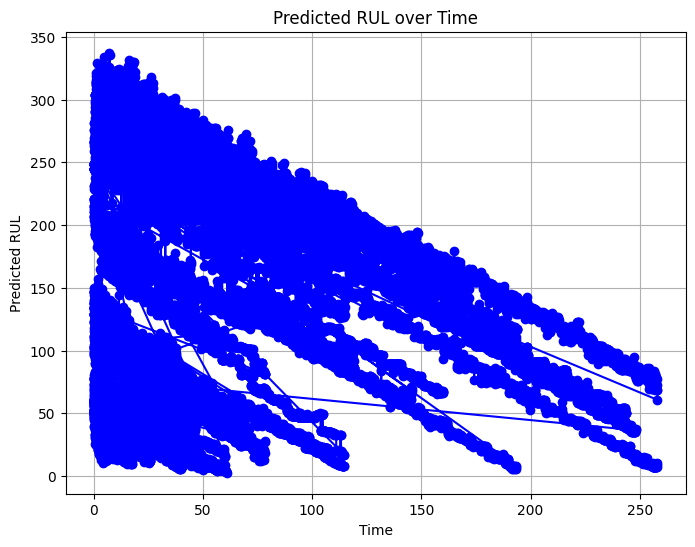

In [ ]:
plt.figure(figsize=(8, 6))

# Plot predicted RUL on y-axis and time on x-axis
plt.plot(X_train_new['Time'], y_pred_xgb, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Predicted RUL')
plt.title('Predicted RUL over Time for testing data')

# Show plot
plt.grid(True)
plt.show()